<a href="https://colab.research.google.com/github/Mrfrktmrck19/Convolutional-autoencoder-for-image-denoising/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
# def feature_standardization():          #not try yet
#     datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [2]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

In [3]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [4]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [5]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [7]:
# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

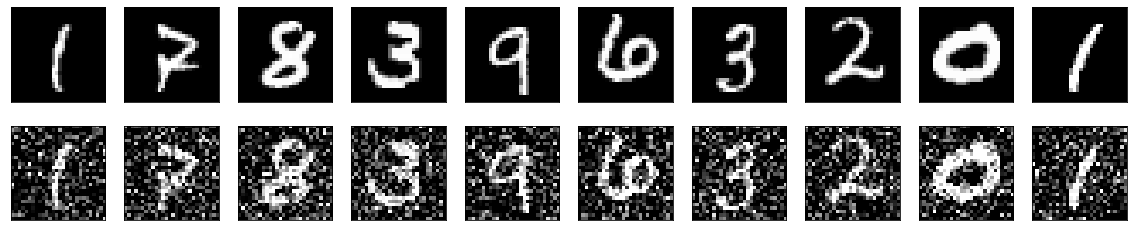

In [8]:
# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [9]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [10]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=5,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/5
469/469 [==============================] - 141s 299ms/step - loss: 0.1311 - val_loss: 0.0728
Epoch 2/5
469/469 [==============================] - 140s 298ms/step - loss: 0.0713 - val_loss: 0.0694
Epoch 3/5
469/469 [==============================] - 140s 299ms/step - loss: 0.0690 - val_loss: 0.0678
Epoch 4/5
469/469 [==============================] - 141s 300ms/step - loss: 0.0678 - val_loss: 0.0669
Epoch 5/5
469/469 [==============================] - 140s 299ms/step - loss: 0.0670 - val_loss: 0.0662


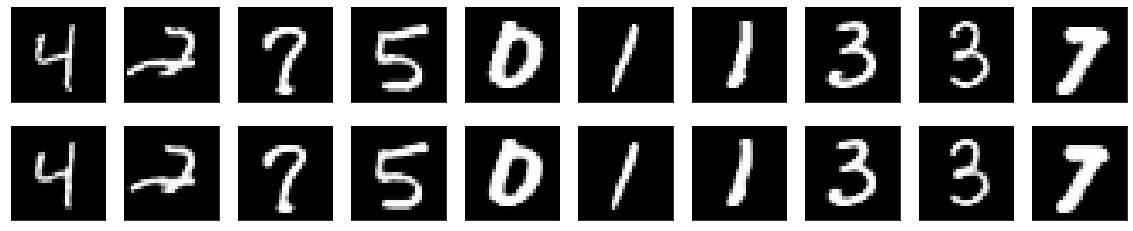

In [11]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [12]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 143s 305ms/step - loss: 0.1010 - val_loss: 0.0946
Epoch 2/100
469/469 [==============================] - 143s 305ms/step - loss: 0.0940 - val_loss: 0.0925
Epoch 3/100
469/469 [==============================] - 143s 305ms/step - loss: 0.0922 - val_loss: 0.0911
Epoch 4/100
469/469 [==============================] - 143s 305ms/step - loss: 0.0911 - val_loss: 0.0901
Epoch 5/100
469/469 [==============================] - 143s 304ms/step - loss: 0.0903 - val_loss: 0.0895
Epoch 6/100
469/469 [==============================] - 144s 307ms/step - loss: 0.0896 - val_loss: 0.0890
Epoch 7/100
469/469 [==============================] - 143s 305ms/step - loss: 0.0891 - val_loss: 0.0884
Epoch 8/100
469/469 [==============================] - 144s 306ms/step - loss: 0.0886 - val_loss: 0.0879
Epoch 9/100
469/469 [==============================] - 143s 304ms/step - loss: 0.0882 - val_loss: 0.0878
Epoch 10/100
469/469 [==============================] -

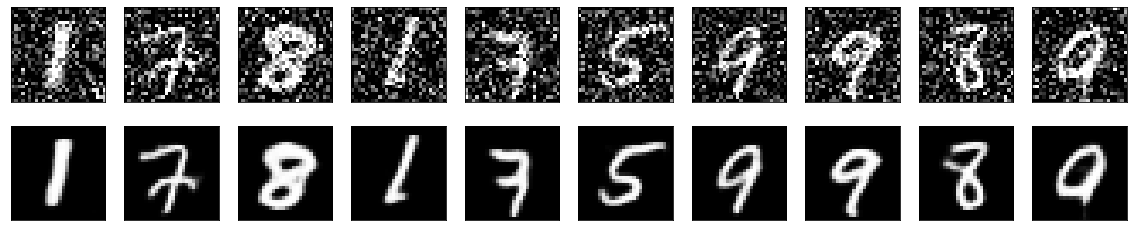

In [13]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)